# mnist

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


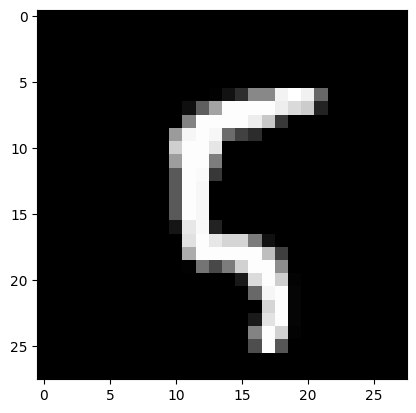

5


In [ ]:
plt.imshow(train_images[100], 'gray')
plt.show()
print(train_labels[100])


In [ ]:
import numpy as np
print(np.max(train_images))
print(np.min(train_images))

255
0


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
model = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(32, activation = 'relu',use_bias = True),
    Dense(64, activation = 'relu',use_bias = True),
    Dropout(0.2),
    Dense(10, activation = 'softmax',use_bias = True)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,882 (108.91 KB)

 Trainable params: 27,882 (108.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_images, train_labels, epochs = 5) # which means batch size is 32

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7963 - loss: 0.6668
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9442 - loss: 0.1913
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9560 - loss: 0.1512
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9622 - loss: 0.1247
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1095


In [ ]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9627 - loss: 0.1208


[0.11079780012369156, 0.965499997138977]

##모델 구조 다르게 만들어보기

In [ ]:
test_images[0].reshape(-1,28,28).shape

(1, 28, 28)

In [ ]:
model.predict(test_images[0].reshape(-1,28,28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


array([[2.6475759e-09, 2.7987710e-06, 1.4819328e-05, 4.4571247e-04,
        3.9102450e-09, 4.5618492e-07, 2.3947734e-14, 9.9953568e-01,
        9.9251253e-08, 5.2996558e-07]], dtype=float32)

In [ ]:
def pred(img):
  plt.imshow(img, cmap = 'gray')
  plt.show()
  image = img.reshape(-1,28,28)
  prob = model.predict(image)
  pred_label = np.argmax(prob)
  pred_prob = np.max(prob)
  print(f'pred_label : {pred_label}, pred_prob : {pred_prob}')


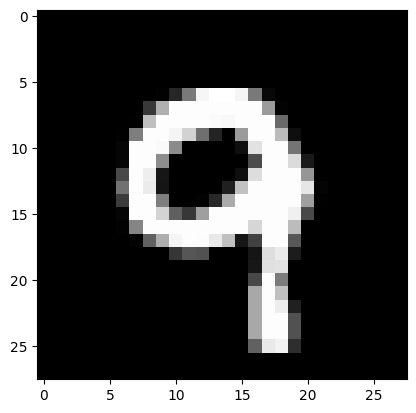

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
pred_label : 9, pred_prob : 0.9999732971191406


In [ ]:
pred(test_images[99])

In [ ]:
train_data = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_data = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
print(train_data.shape)

(60000, 28, 28, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(28, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', use_bias = True))
model.add(Dropout(0.5))
model.add(Dense(70, activation = 'relu',use_bias= True))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax', use_bias = True))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x= train_data, y = train_labels, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.7416 - loss: 0.7958
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9492 - loss: 0.1890
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.9641 - loss: 0.1328
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9692 - loss: 0.1121
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9744 - loss: 0.0930


In [ ]:
model.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9831 - loss: 0.0594


[0.05012616887688637, 0.9855999946594238]

## CNN을 이용한 classification test

In [ ]:
!rm -rf *

In [ ]:
!wget https://github.com/soribido/catvsdog/raw/main/catdogtest.zip
!wget https://github.com/soribido/catvsdog/raw/main/catdog4000.zip

--2024-11-29 15:04:40--  https://github.com/soribido/catvsdog/raw/main/catdogtest.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/soribido/catvsdog/main/catdogtest.zip [following]
--2024-11-29 15:04:40--  https://raw.githubusercontent.com/soribido/catvsdog/main/catdogtest.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4436700 (4.2M) [application/zip]
Saving to: ‘catdogtest.zip’

catdogtest.zip      100%[===================>]   4.23M  --.-KB/s    in 0.07s   

2024-11-29 15:04:41 (61.8 MB/s) - ‘catdogtest.zip’ saved [4436700/4436700]

--2024-11-29 15:04:41--  https://github.com/soribido/c

In [ ]:
!unzip catdog4000.zip
!unzip catdogtest.zip

Archive:  catdog4000.zip
   creating: catdog4000/
  inflating: catdog4000/cat.0.jpg    
  inflating: catdog4000/cat.1.jpg    
  inflating: catdog4000/cat.10.jpg   
  inflating: catdog4000/cat.100.jpg  
  inflating: catdog4000/cat.1000.jpg  
  inflating: catdog4000/cat.1001.jpg  
  inflating: catdog4000/cat.1002.jpg  
  inflating: catdog4000/cat.1003.jpg  
  inflating: catdog4000/cat.1004.jpg  
  inflating: catdog4000/cat.1005.jpg  
  inflating: catdog4000/cat.1006.jpg  
  inflating: catdog4000/cat.1007.jpg  
  inflating: catdog4000/cat.1008.jpg  
  inflating: catdog4000/cat.1009.jpg  
  inflating: catdog4000/cat.101.jpg  
  inflating: catdog4000/cat.1010.jpg  
  inflating: catdog4000/cat.1011.jpg  
  inflating: catdog4000/cat.1012.jpg  
  inflating: catdog4000/cat.1013.jpg  
  inflating: catdog4000/cat.1014.jpg  
  inflating: catdog4000/cat.1015.jpg  
  inflating: catdog4000/cat.1016.jpg  
  inflating: catdog4000/cat.1017.jpg  
  inflating: catdog4000/cat.1018.jpg  
  inflating: catdog

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
import random
import time
import pandas as pd
from tensorflow.keras.utils import to_categorical

In [ ]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
path = './catdog4000/'
filenames = os.listdir(path)
filenames[:5]

['dog.1025.jpg', 'dog.1841.jpg', 'cat.748.jpg', 'dog.1923.jpg', 'cat.34.jpg']

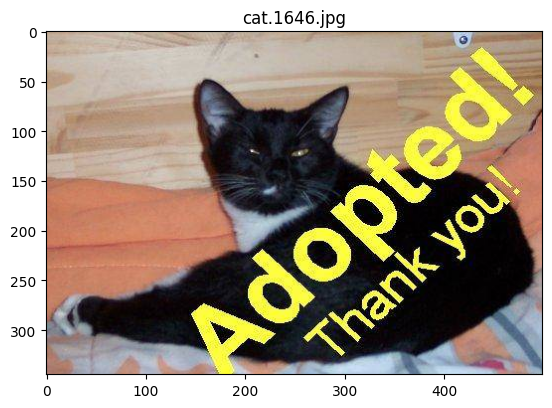

In [ ]:
testnum = np.random.randint(0, len(filenames))
testimg = cv2.imread(path + filenames[testnum])
testimg = cv2.cvtColor(testimg, cv2.COLOR_BGR2RGB)
plt.imshow(testimg)
plt.title(filenames[testnum])
plt.show()

## label만들기

          filename  category
0     dog.1025.jpg         1
1     dog.1841.jpg         1
2      cat.748.jpg         0
3     dog.1923.jpg         1
4       cat.34.jpg         0
...            ...       ...
3995   cat.939.jpg         0
3996  dog.1940.jpg         1
3997  cat.1113.jpg         0
3998  dog.1759.jpg         1
3999   cat.356.jpg         0

[4000 rows x 2 columns]


<Axes: xlabel='category'>

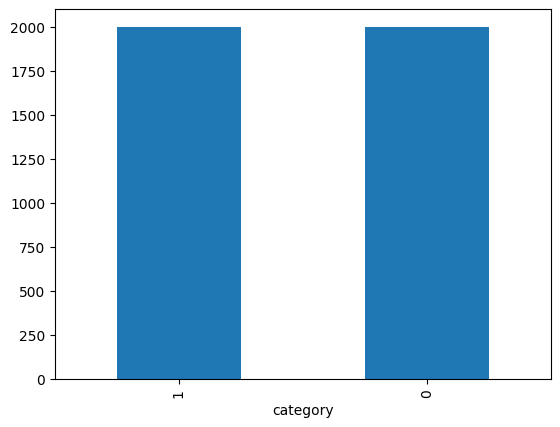

In [ ]:
categories = []
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(df)
df['category'].value_counts().plot.bar()

In [ ]:
df.head()

,filename,category
0,dog.1025.jpg,1
1,dog.1841.jpg,1
2,cat.748.jpg,0
3,dog.1923.jpg,1
4,cat.34.jpg,0


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

## 모델 만들기

In [ ]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = (IMAGE_WIDTH, IMAGE_WIDTH, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.1))

  model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape = (IMAGE_WIDTH, IMAGE_WIDTH, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(0.1))

  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Dense(2, activation = 'softmax'))
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model
model = create_model()
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,409,282 (32.08 MB)

 Trainable params: 8,408,834 (32.08 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
mcp = ModelCheckpoint(filepath = 'catdog_model.keras', monitor = 'val_loss', save_best_only = True, mode = 'min')
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, factor = 0.5, min_lr = 0.00001, verbose = 1)
callbacks = [earlystop, mcp, learning_rate_reduction]
df['category'] = df['category'].replace({0: 'cat', 1: 'dog'})


In [ ]:
df.head()

,filename,category
0,dog.1025.jpg,dog
1,dog.1841.jpg,dog
2,cat.748.jpg,cat
3,dog.1923.jpg,dog
4,cat.34.jpg,cat


In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size = 0.2, random_state = 42)
train_df.head()

,filename,category
3994,cat.1849.jpg,cat
423,cat.1195.jpg,cat
2991,dog.1173.jpg,dog
1221,dog.732.jpg,dog
506,cat.1696.jpg,cat


# 학습